# K Nearest Neighbors with Python
 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.



## Import Libraries



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Get the Data

In [3]:
df = pd.read_csv('Classified Data', index_col=0)

df.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. 

Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

#### Fit scaler to all feature classes

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
# Do a standard scale tranformation
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [13]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [15]:
# create a feature dataframe
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [18]:
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=77)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

## Predictions and Evaluations

Let's evaluate our KNN model!

In [25]:
pred = knn.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print ('confusion Matrix')
print (confusion_matrix(y_test,pred))

print ('classification report')
print (classification_report(y_test,pred))

confusion Matrix
[[152   6]
 [  9 163]]
classification report
             precision    recall  f1-score   support

          0       0.94      0.96      0.95       158
          1       0.96      0.95      0.96       172

avg / total       0.95      0.95      0.95       330



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [31]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

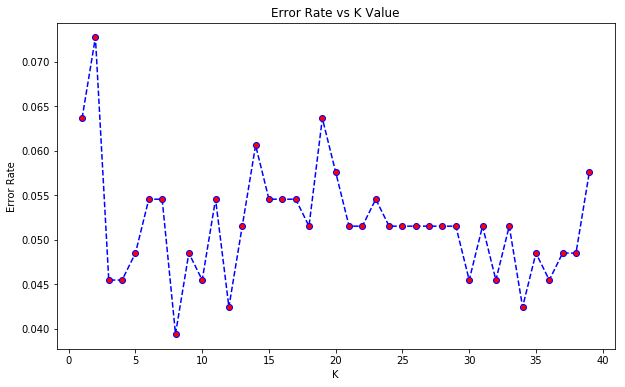

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='b',
         ls='--',marker='o',markerfacecolor='r')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [40]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
error_rate.append(np.mean(pred_i != y_test))

print ('confusion Matrix')
print (confusion_matrix(y_test,pred))
print('/n')
print ('classification report')
print (classification_report(y_test,pred))

confusion Matrix
[[148  10]
 [  6 166]]
/n
classification report
             precision    recall  f1-score   support

          0       0.96      0.94      0.95       158
          1       0.94      0.97      0.95       172

avg / total       0.95      0.95      0.95       330



We were able to squeeze some more performance out of our model by tuning to a better K value!